# Task 2 - Dynamical systems

In [2]:
import numpy as np
import numpy.matlib 
import math
import matplotlib.pyplot as plt
import csv
from matplotlib import cm

## Task 2 Part 2 - *Simulating Van der pol with midpoint method*

In [3]:
class Numerical_methods:
    
    def __init__(self,f):  
        
        self.f=f
        self.x=[]
        self.t=[]
        self.N_dim=[]
        
        
    def Initialise(self,x_start,t_start, mu=None):
        self.N_dim=np.shape(x_start)[0]
        self.x=x_start
        self.t=t_start
        self.mu=mu
    
    def MidPoint(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            if not self.mu:
                x_mp=self.x+dt/2*f(self.x,self.t)
                self.x=self.x+dt*f(x_mp,self.t+dt/2)
            else:
                x_mp=self.x+dt/2*f(self.x,self.t, self.mu)
                self.x=self.x+dt*f(x_mp,self.t+dt/2,self.mu)
            
            
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T

                

# van der pol oscillator
Initially was $$ \dfrac{\mathrm{d^2} x}{\mathrm{d} t^2} - \mu(1-x^2)\dfrac{\mathrm{d} x}{\mathrm{d} t} + x = 0 $$

Now made into a first order differential equation
$$\begin{cases} \dfrac{\mathrm{d} x}{\mathrm{d} t}= v(t) \\
                \dfrac{\mathrm{d}v(t)}{\mathrm{d}t}= -x + \mu(1-x^2) v(t)\end{cases}$$

In [4]:
# Function for van der pol osscilator
def f(x,t,mu):
    z=np.zeros([np.shape(x)[0]])
    
    z[0]=x[1]
    z[1]=-x[0] + mu*(1-x[0]**2)*x[1]
    
    return z

In [5]:
# simulating the full process of approximating N solutions + plotting it
'''
    mu: value of mu used in simulation
    x: the initial condition
    step_size: discretisation step
    iterations: number of iterations simulation will continue for
    mu_vals: list of values of mu to run simulation with
    plot_time: False if phase plot is being plotted True if x,y plotted against time
'''
def full_process_vdp(mu,x,N,step_size,iterations,mu_vals=None,plot_time=False):
    if not plot_time:
        fig, ax = plt.subplots(figsize=(8, 8))
    for i in range(N):
        NM=Numerical_methods(f)         
        dt=step_size                       
        N_iter=int(iterations/dt)               

        X_mp=np.zeros([2,N_iter])
        x_start=[-2,0]
        t_start=0
        
        if mu_vals == None:
            NM.Initialise(x_start,t_start,mu) 
        else:
            NM.Initialise(x_start,t_start,mu_vals[i]) 
        X_mp,ts=NM.MidPoint(dt,N_iter)
        if plot_time:
            # plot x and yvalues against time
            fig1, (ax1,ax2) = plt.subplots(1, 2,figsize=(16, 4))
            ax1.set_title('X value across iterations')
            ax1.set_xlabel('Number of Iterations')
            ax1.set_ylabel('X Value')
            ax2.set_title('Y value across iterations')
            ax2.set_xlabel('Number of Iterations')
            ax2.set_ylabel('Y Value')
            ax1.plot(ts,X_mp[0,:],color='b',linewidth=2)
            ax2.plot(ts,X_mp[1,:],color='b',linewidth=2)
        else:
            # do phase plot
            ax.set_title('Phase Plot')
            ax.set_xlabel('Value of X')
            ax.set_ylabel('Value of Y')
            ax.plot(X_mp[0,:],X_mp[1,:],color='b',linewidth=2)

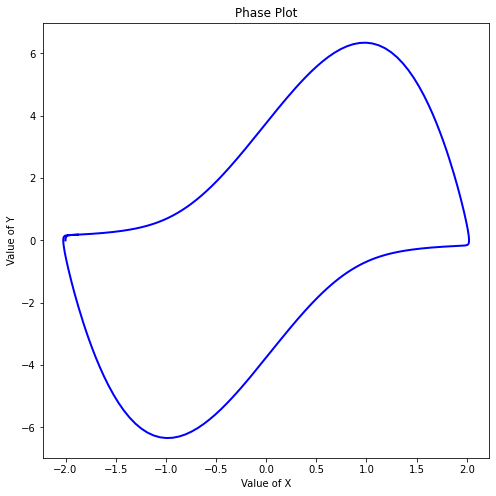

In [12]:
# Example of a phase plot with [2,0] as starting points and a step size of 0.01 and mu value 4
full_process_vdp(4,[2,0],1,0.01,11)

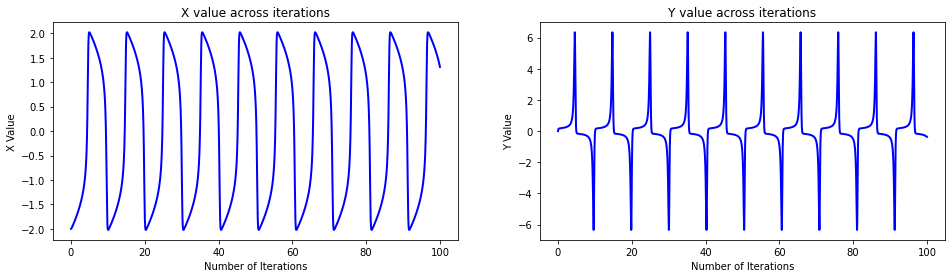

In [164]:
# Shows x and y values oscillate across time with mu value 4
full_process_vdp(4,[2,0],1,0.01,100,plot_time=True)

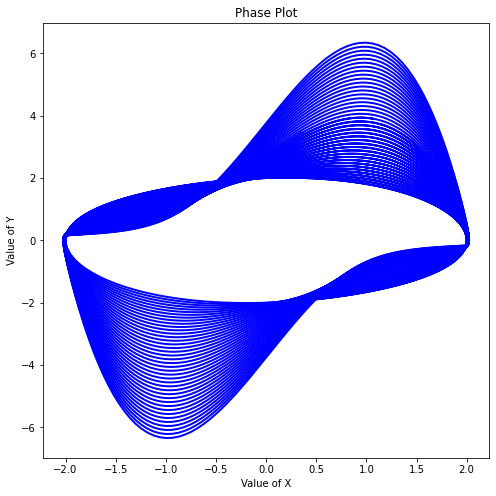

In [165]:
# plotting van der pol with different mu values as a phase plot
mu_vals = list(np.arange(1,41)*0.1) # 0 -> 4 with step of 0.1 e.g. [0.1,0.2,0.3,...,3.9,4.0]
full_process_vdp(4,[2,0],len(mu_vals),0.01,11,mu_vals=mu_vals)

## Task 2 Part 3 

### 1. Explain Your choice of Numerical Method
Of the three numerical methods studied (Eulers method, Midpoint Mehtod and Runge Kutta 2) Euler was the worst performing method when taking into account the magnitude of the error caused by its prediction. When using Eulers method the local error, error of the prediction at the next time step, is $ O(\delta t^2)$ wheras Runge Kutta and the Midpoint methods local error in prediction is $O(\delta t^3) $. Since $ t< 0$ the bigger magnitude of the order the smaller the error. This is also the same for the global error, the total error across all predictions, where Eulers method has a global error of $O(\delta t)$ wheras Runge Kutta and the Midpoint method have a global error of $O(\delta t^2)$. This is why Eulers method was not chosen for the numerical method. Since the Midpoint method and Runge Kutta 2 produce errors of the same magnitude either one would be suitable to use. We chose to use the Midpoint method
 
### 2. Explain Your choice of discretisation step
Since we have chosen to go forth with the Midpoint method, we know that the rate of growth of the global error is $O(\delta t^2)$. Based on this information we can conclude that the most appropriate step size that would give us the most accurate approximation of the solution to the Van Der Pol Oscillator by reducing the error would be 0.01, anything less than this doesnt seem to give more accurate results. The example below shows the error when using a step size larger than 0.01

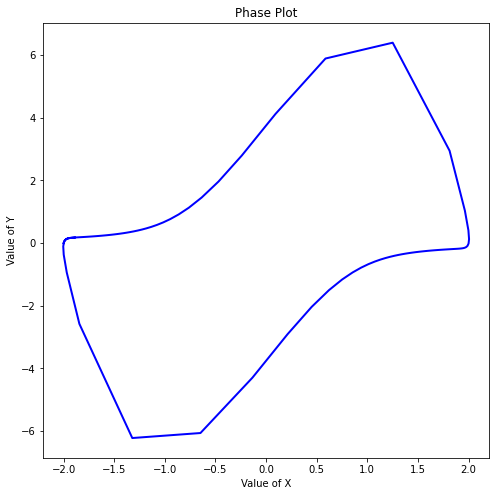

In [167]:
# Example of a phase plot with [0,0] as starting points and a step size of 0.1
full_process_vdp(4,[2,0],1,0.1,11)